In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
milk = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/monthly-milk-production.csv',index_col='Month')

In [ ]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [ ]:
milk.index = pd.to_datetime(milk.index)

<Axes: xlabel='Month'>

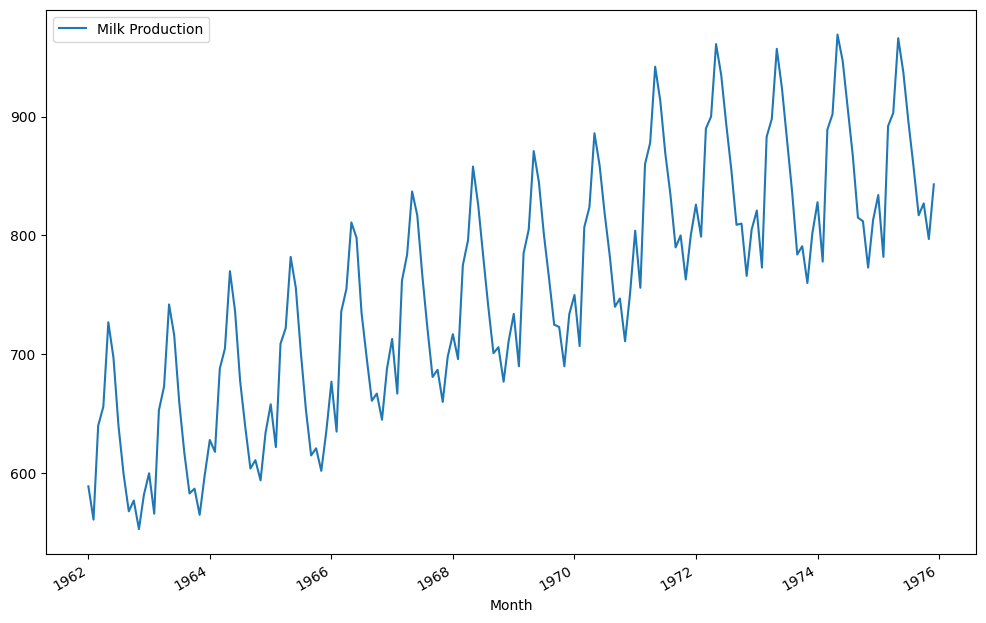

In [ ]:
milk.plot(figsize=(12,8))

In [ ]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Milk Production  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [ ]:
len(milk)

168

In [ ]:
test_size = 12
test_index = len(milk) - test_size

In [ ]:
train = milk.iloc[:test_index]
test = milk.iloc[test_index:]

In [ ]:
train

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1974-08-01 01:00:00,867.0
1974-09-01 01:00:00,815.0
1974-10-01 01:00:00,812.0


In [ ]:
test

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()

In [ ]:
scaled_train = scalar.fit_transform(train)

In [ ]:
scaled_test = scalar.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
len(test)

12

In [ ]:
length = 10
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [ ]:
X,y = generator[0]

In [ ]:
X

array([[[0.08653846],
        [0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231]]])

In [ ]:
y

array([[0.]])

In [ ]:
len(X[0])

10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, GRU

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(GRU(160,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0852 - val_loss: 0.0102
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0209 - val_loss: 0.0085
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0189 - val_loss: 0.0062
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0135 - val_loss: 0.0224
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0147 - val_loss: 0.0076
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0103 - val_loss: 0.0046
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0087 - val_loss: 0.0043
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0074 - val_loss: 0.0088
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0091 - val_loss: 0.0052
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0075 - val_loss: 0.0050
Epoch 12/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0077 - val_loss: 0.0050


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

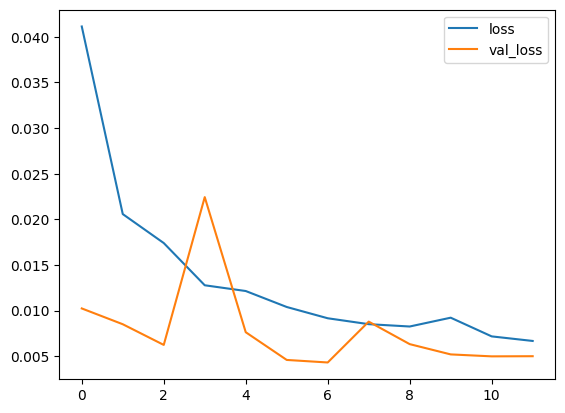

In [ ]:
losses.plot()

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
true_predictions = scalar.inverse_transform(test_predictions)

In [ ]:
test['Predicitons'] = true_predictions

<ipython-input-253-3fe401b44c7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicitons'] = true_predictions


<Axes: xlabel='Month'>

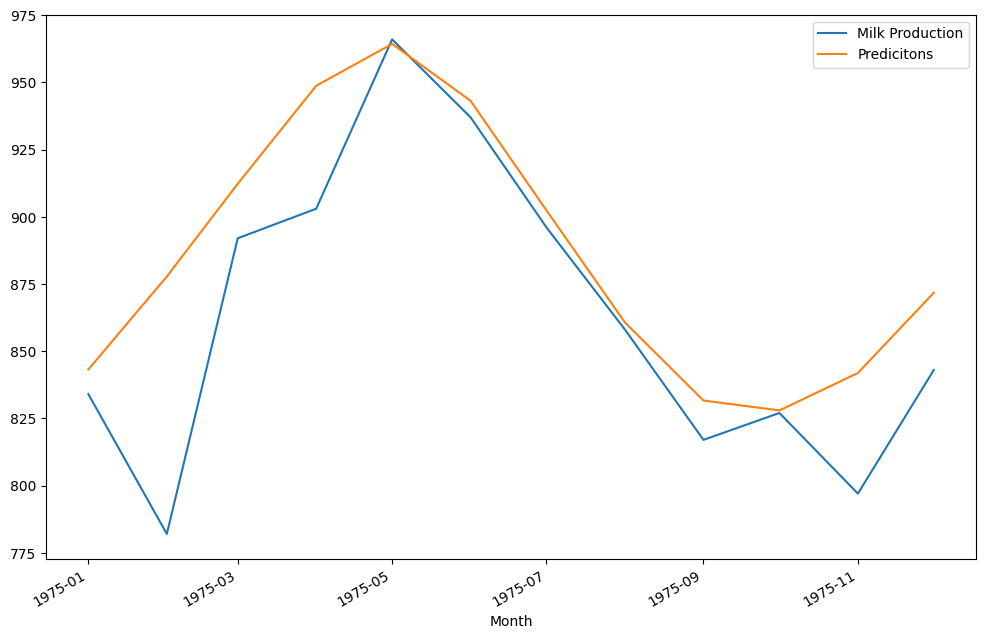

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
full_scaler = MinMaxScaler()

In [ ]:
scaled_full_data = full_scaler.fit_transform(milk)

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [ ]:
model =Sequential()

model.add(LSTM(165,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(generator,epochs=12)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  7/156 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3793

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1148
Epoch 2/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0209
Epoch 3/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0193
Epoch 4/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0174
Epoch 5/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0065
Epoch 6/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0054
Epoch 7/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0060
Epoch 8/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038
Epoch 9/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0065
Epoch 10/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0041
Epoch 11/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0043
Epoch 12/12
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0026


In [ ]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)
periods = 12

for i in range(periods):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
forecast = scalar.inverse_transform(forecast)

In [ ]:
forecast_index = pd.date_range(start='1976-01-01',periods=periods,freq='MS')

In [ ]:
forecast_index

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01', '1976-11-01', '1976-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_milk = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast_Milk'])

(730.0, 2526.0)

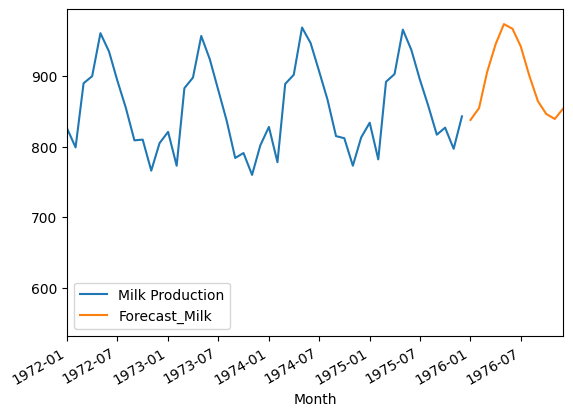

In [ ]:
ax = milk.plot()
forecast_milk.plot(ax=ax)
plt.xlim('1972-01-01','1976-12-01')